###도전 과제 영화 리뷰 감성 분석###

In [22]:
#1. 데이터셋 불러오기 
import pandas as pd 
import numpy as np 
import seaborn as sns

In [11]:
#1-1 파일 불러오기
df = pd.read_csv("./netflix_reviews.csv")

In [12]:
print(df)


                                    reviewId           userName  \
0       411500b0-ac01-4071-badf-8aa8a45d0f29            Priya S   
1       5ef1c68e-9d84-4afb-8c58-829a554dc89b        angel dolla   
2       1fe7e31a-43d9-406e-94cd-549d019ec70f  CHRISTIAN SUMATRA   
3       c5cb0034-5395-417e-ad31-84c6ac79340b        Raghu Pathy   
4       43257f77-7b9e-40b8-ac56-c87ff3130619       Rebecka Todd   
...                                      ...                ...   
117214  a760ead9-e7aa-4ed1-a651-5c37c3600dac      A Google user   
117215  4957f9e7-d7f4-4a52-9764-031cebcac83f       Captain Jeoy   
117216  9acf7586-7abf-4b50-8c50-3ede3b2a42c4           Suryansh   
117217  32870f7f-c461-4256-b602-75244ca60248      A Google user   
117218  dc1352e9-10a8-41ca-ab23-05d045b08e90         suraj soni   

                                                  content  score  \
0       With basic plan, Netflix can consider to allow...      2   
1                                    Good app for series.  

In [28]:
print(df.head()) 

                               reviewId           userName  \
0  411500b0-ac01-4071-badf-8aa8a45d0f29            Priya S   
1  5ef1c68e-9d84-4afb-8c58-829a554dc89b        angel dolla   
2  1fe7e31a-43d9-406e-94cd-549d019ec70f  CHRISTIAN SUMATRA   
3  c5cb0034-5395-417e-ad31-84c6ac79340b        Raghu Pathy   
4  43257f77-7b9e-40b8-ac56-c87ff3130619       Rebecka Todd   

                                             content  score  thumbsUpCount  \
0  With basic plan, Netflix can consider to allow...      2              0   
1                               Good app for series.      5              0   
2  Laging wala mga movies na magaganda potangina ...      1              0   
3  This app uses more data and it's asking withou...      1              0   
4  Since the latest update i am not able to load ...      1              0   

    reviewCreatedVersion                   at             appVersion  
0  8.137.0 build 4 50942  2024-10-22 14:16:52  8.137.0 build 4 50942  
1  8.137.0 build

In [29]:
print(df.tail())

                                    reviewId       userName  \
117214  a760ead9-e7aa-4ed1-a651-5c37c3600dac  A Google user   
117215  4957f9e7-d7f4-4a52-9764-031cebcac83f   Captain Jeoy   
117216  9acf7586-7abf-4b50-8c50-3ede3b2a42c4       Suryansh   
117217  32870f7f-c461-4256-b602-75244ca60248  A Google user   
117218  dc1352e9-10a8-41ca-ab23-05d045b08e90     suraj soni   

                                                  content  score  \
117214  i really like it! there are so many movies and...      5   
117215   I love Netflix. I always enjoy my time using it.      5   
117216               Sound quality is very slow of movies      1   
117217  Rate is very expensive.. bcos we see netflix s...      1   
117218  this app is awesome for english movies ,series...      4   

        thumbsUpCount   reviewCreatedVersion                   at  \
117214              0                    NaN  2019-08-03 15:06:03   
117215              0   8.34.0 build 4 50250  2022-08-15 16:16:30   
11721

In [30]:
print(f'Shape of the dataset: {df.shape}')

Shape of the dataset: (117219, 8)


In [31]:
print(f'Columns in the dataset: {df.columns}')

Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [17]:
#2.데이터 전처리

def preprocess_text(text): #전처리된 텍스를 반환
    if isinstance(text, float): #실수형 숫자 일 경우 문자열로 반환
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

In [32]:
df['cleaned_content'] = df['content'].apply(preprocess_text)

In [33]:
print(df[['content', 'cleaned_content']].head())

                                             content  \
0  With basic plan, Netflix can consider to allow...   
1                               Good app for series.   
2  Laging wala mga movies na magaganda potangina ...   
3  This app uses more data and it's asking withou...   
4  Since the latest update i am not able to load ...   

                                     cleaned_content  
0  with basic plan netflix can consider to allow ...  
1                                good app for series  
2  laging wala mga movies na magaganda potangina ...  
3  this app uses more data and its asking without...  
4  since the latest update i am not able to load ...  


In [34]:
#3.feature 분석(EDA)

import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트 (없으면 설치 바랍니다)
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

sns.barplot(x='score', y='count', dara=df) #막대 그래프를 그리는 함수
plt.xlabel('Score') #x축을 레이블을 'score'로 설정
plt.ylabel('Count') #y축을 레이블을 'count'로 설정
plt.title('Distribution of Scores') # 그래프 제목 설정
plt.show() # 그래프를 화면에 표시 

ValueError: Could not interpret value `score` for `x`. Value is a string, but `data` was not passed.

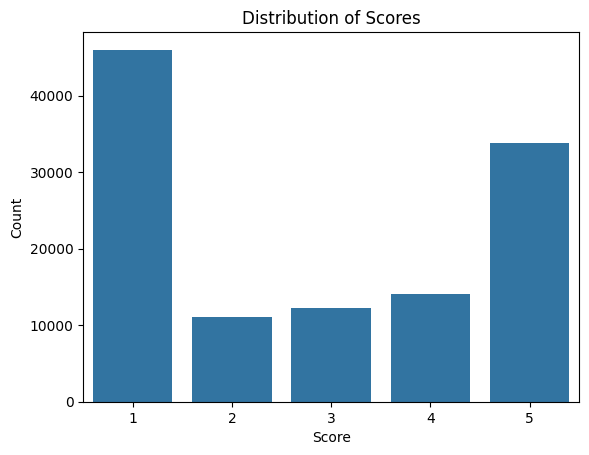

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# 리뷰 점수 분포 그래프
sns.countplot(data=df, x='score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()

In [46]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


# 데이터셋 클래스 정의
class ReviewDataset(Dataset):
    def __init__(self, reviews, ratings, text_pipeline, label_pipeline):
        self.reviews = reviews
        self.ratings = ratings
        self.text_pipeline = text_pipeline
        self.label_pipeline = label_pipeline

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, idx):
        review = self.text_pipeline(self.reviews[idx])
        rating = self.label_pipeline(self.ratings[idx])
        return torch.tensor(review), torch.tensor(rating)

# 데이터셋 정의
train_dataset = ReviewDataset(train_reviews, train_ratings, text_pipeline, label_pipeline)
test_dataset = ReviewDataset(test_reviews, test_ratings, text_pipeline, label_pipeline)

# 데이터 로더 정의
BATCH_SIZE = 64

train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# LSTM 모델 정의
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, text):
        embedded = self.embedding(text)
        output, (hidden, cell) = self.lstm(embedded.unsqueeze(0))
        return self.fc(hidden[-1])

# 하이퍼파라미터 정의
VOCAB_SIZE = len(vocab)
EMBED_DIM = 64
HIDDEN_DIM = 128
OUTPUT_DIM = len(set(ratings))  # 예측할 점수 개수

# 모델 초기화
model = LSTMModel(VOCAB_SIZE, EMBED_DIM, HIDDEN_DIM, OUTPUT_DIM)

# 손실 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 모델 학습은 직접 작성해보세요!!!

# 예측 함수(예시)
def predict_review(model, review):
    model.eval()
    with torch.no_grad():
        tensor_review = torch.tensor(text_pipeline(review))
        output = model(tensor_review)
        prediction = output.argmax(1).item()
        return label_encoder.inverse_transform([prediction])[0]

# 새로운 리뷰에 대한 예측
new_review = "This app is great but has some bugs."
predicted_score = predict_review(model, new_review)
print(f'Predicted Score: {predicted_score}')

OSError: [WinError 127] 지정된 프로시저를 찾을 수 없습니다